# ASSIGNMENT OF SKYGENI COMPANY

# Praveen Kumar Tiwari
# 12104582

# Load the dataset("GRE_Reg_Data")

In [28]:
import pandas as pd

In [29]:
df = pd.read_csv("C:/Users/Praveen Kumar Tiwari/OneDrive/Desktop/SkyGeni/GRE_Reg_Data.csv")
df

,REGISTRATION_NO,Date Registered,DATE OF EXAM OCC,TIME OCC,Age,Sex
0,221412410,6/15/2022,11/12/2020,1700,0,NaN
1,220314085,7/22/2022,5/12/2020,1110,27,F
2,222013040,8/6/2022,6/4/2020,1620,60,M
3,220614831,8/18/2022,8/17/2020,1200,28,M
4,231207725,2/27/2023,1/27/2020,635,37,M
...,...,...,...,...,...,...
247983,231510379,5/29/2023,5/25/2023,1100,25,M
247984,231604807,1/27/2023,1/26/2023,1800,23,M
247985,231606525,3/22/2023,3/22/2023,1000,25,F
247986,231210064,4/12/2023,4/12/2023,1630,29,M


In [30]:
#Summarize the contents of the data
df.describe

<bound method NDFrame.describe of         REGISTRATION_NO Date Registered DATE OF EXAM OCC  TIME OCC  Age  Sex
0             221412410       6/15/2022       11/12/2020      1700    0  NaN
1             220314085       7/22/2022        5/12/2020      1110   27    F
2             222013040        8/6/2022         6/4/2020      1620   60    M
3             220614831       8/18/2022        8/17/2020      1200   28    M
4             231207725       2/27/2023        1/27/2020       635   37    M
...                 ...             ...              ...       ...  ...  ...
247983        231510379       5/29/2023        5/25/2023      1100   25    M
247984        231604807       1/27/2023        1/26/2023      1800   23    M
247985        231606525       3/22/2023        3/22/2023      1000   25    F
247986        231210064       4/12/2023        4/12/2023      1630   29    M
247987        230906458        3/5/2023         3/5/2023       900   53    F

[247988 rows x 6 columns]>

# Plot the diagram of the frequencies

In [ ]:
import matplotlib.pyplot as plt

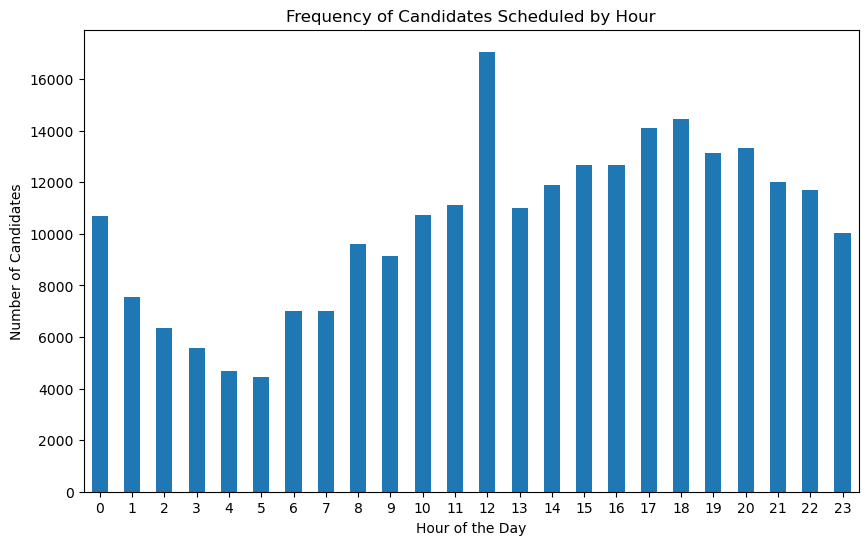

In [31]:
# Convert 'TIME OCC' to string and pad with zeros to ensure a uniform format
df['TIME OCC'] = df['TIME OCC'].astype(str).str.zfill(4)

# Extract the hour from 'TIME OCC' and create a new column 'Hour'
df['Hour'] = df['TIME OCC'].str[:2]

# Convert 'Hour' to integer
df['Hour'] = df['Hour'].astype(int)

# Count the frequency of each hour
hourly_frequency = df['Hour'].value_counts().sort_index()

# Ploting the frequencies using seaborn library
plt.figure(figsize=(10, 6))
hourly_frequency.plot(kind='bar')
plt.title('Frequency of Candidates Scheduled by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Candidates')
plt.xticks(rotation=0)
plt.show()

#                                    Hour 12  has the highest frequency of candidates scheduled to take up exams

# .......................................................................................................................................................

# ......................................................................................................................................................

# Number of candidates taken exam both at day and night

# Define a function to categorize 'Day' and 'Night'

In [32]:
def categorize_day_night(time_str):
    time = int(time_str.zfill(4)[:2])  # Convert time to 24-hour format and get the hour
    if 6 <= time <= 21:  # From 06:00 AM to 09:00 PM is considered 'Day'
        return 'Day'
    else:  # All other times are considered 'Night'
        return 'Night'

# Apply the function to the 'TIME OCC' column to create a new 'Day_Night' column

In [33]:
df['Day_Night'] = df['TIME OCC'].apply(categorize_day_night)

# Create a pivot table to count the number of candidates by 'Hour' and 'Day_Night'

In [34]:
pivot_table = df.pivot_table(index='Hour', columns='Day_Night', aggfunc='size', fill_value=0)

# Plot the stacked bar graph

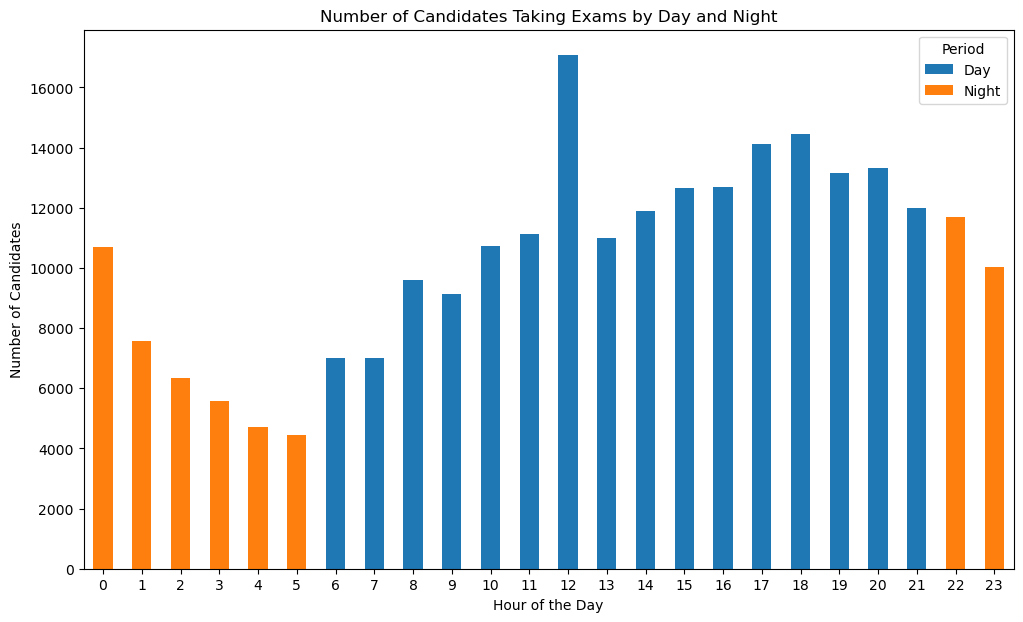

In [35]:
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Number of Candidates Taking Exams by Day and Night')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Candidates')
plt.xticks(rotation=0)
plt.legend(title='Period')
plt.show()

# ......................................................................................................................................................

# ......................................................................................................................................................

#  The number of candidates scheduled to write exam in different age groups

# labels of age group are: "0-17", "18-25", "26-34", "35-44", "45-54", "55-64", and "65+"

In [36]:
# Define the age bins and labels for the categorization
age_bins = [0, 17, 25, 34, 44, 54, 64, float('inf')]
age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]
# Categorize the 'Age' column into discrete age groups
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
# Count the frequency of candidates in each age group
age_group_frequency = df['Age Group'].value_counts().reindex(age_labels, fill_value=0)
print(age_group_frequency)

Age Group
0-17     65864
18-25    24366
26-34    47288
35-44    43759
45-54    29247
55-64    21116
65+      16315
Name: count, dtype: int64


# Visualization for different Age_Group

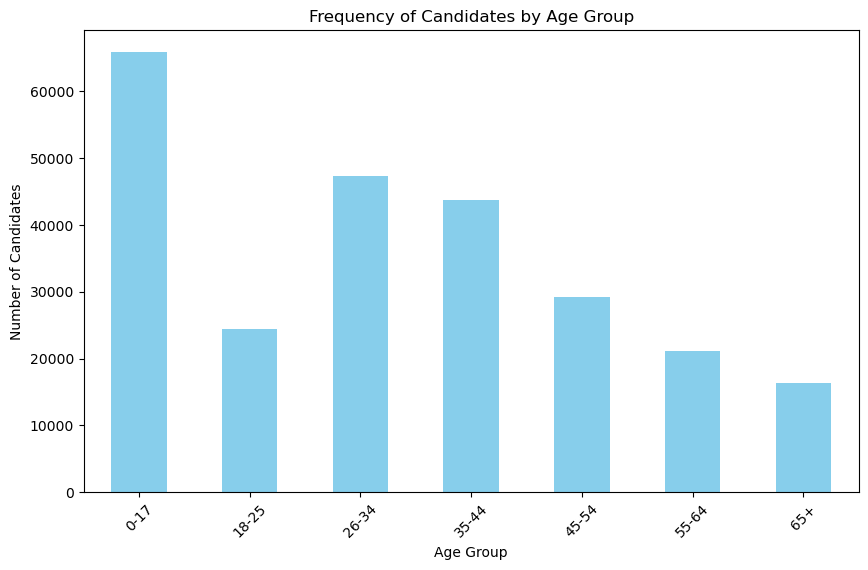

In [40]:
age_group_frequency.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Frequency of Candidates by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Candidates')
plt.xticks(rotation=45)
plt.show()

# ......................................................................................................................................................

# ......................................................................................................................................................

# Total number of Male and Female candidates scheduled for exams

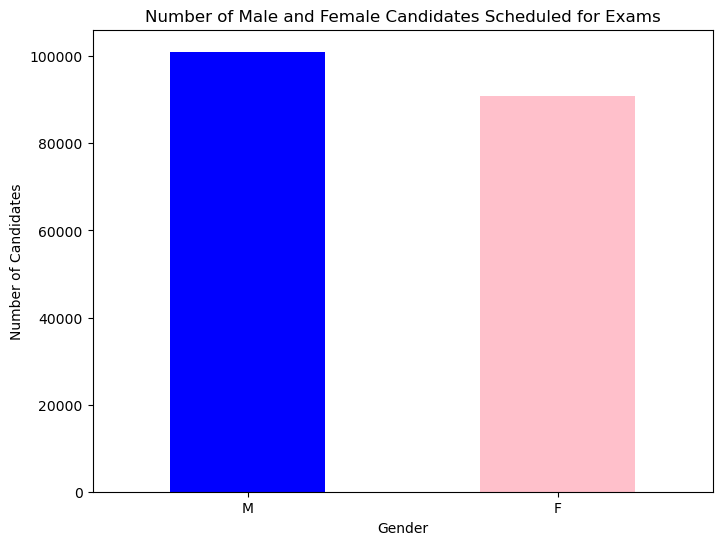

In [37]:
# Count the number of male and female candidates
gender_counts = df['Sex'].value_counts()

# Filter out any non-binary values if present, assuming 'M' for male and 'F' for female
gender_counts = gender_counts[gender_counts.index.isin(['M', 'F'])]

# Plot the bar graph
gender_counts.plot(kind='bar', figsize=(8, 6), color=['blue', 'pink'])
plt.title('Number of Male and Female Candidates Scheduled for Exams')
plt.xlabel('Gender')
plt.ylabel('Number of Candidates')
plt.xticks(rotation=0)
plt.show()


#                                                   END OF THE ASSIGNMENT

# ......................................................................................................................................................

# ......................................................................................................................................................